In [2]:
from PIL import Image
import numpy as np
from scipy import ndimage
from scipy import signal
from scipy.stats import kurtosis
from scipy.stats import skew
# from scipy.stats import mean
from scipy.stats import variation
from scipy.stats import rv_histogram

import matplotlib.pyplot as plt

In [3]:
img = Image.open('orgimg.tif').convert('L')

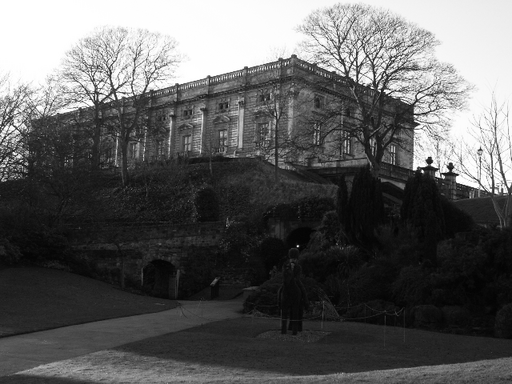

In [4]:
img

In [5]:
def features_kappa(img):
    img = np.array(img , np.float64)
    
    img = img - signal.medfilt2d(img, 3)



    p = 1
    t = 1
    l = 1
    y = 1
    nblksk = 0
    nblkku = 0
    
    #orignal image variables
    n_nansko = 0
    n_nankuo = 0
    n_nankao = 0
    Imo_b = img
    
    [mo,no] = Imo_b.shape

    
    win_sz = 3
    x = win_sz 
    
    tn_blk  = 0
    
    for i in range(0 , mo , 1):
        for j in range(0 , no , 1):
            tn_blk = tn_blk + 1
    
    
    sko = []
    kuo = []

    for i in range(0 , mo , x):
        for j in range(0 , no , x):
            if p >= tn_blk:
                break
            #orignal image moment calculation
            
            blk_sel = Imo_b[i:i+x , j:j+x]

            sko.append(skew(blk_sel.flatten(order='C')) )
            kuo.append(kurtosis(blk_sel.flatten(order='C'))  ) 
            p = p + 1
    

    
    p = 0
    sko_n = []
    kuo_n = []
    nblsk = 0
    nblkku = 0
    
    
    for i in range(len(sko)):
        if sko[i] == 0:
            n_nansko = n_nansko + 1
        else :
            sko_n.append(sko[i])
            nblsk = nblsk + 1
    
    for i in range(len(kuo)):
        if kuo[i] == 0:
            n_nankuo = n_nankuo + 1
        else :
            kuo_n.append(kuo[i])
            nblkku = nblkku + 1
    
    kao = []
    
    for i in range(len(kuo)):
        if ( 4*(4*kuo[i] - 3*(sko[i]**2))*(2*kuo[i]-3*(sko[i]**2) - 6) ) != 0 :
            kao.append(( (sko[i]**2)*((kuo[i] + 3)**2)  )/( 4*(4*kuo[i] - 3*(sko[i]**2))*(2*kuo[i]-3*(sko[i]**2) - 6) )  )
    


    n_nankao = 0
    kao_n = []
    
    for i in range(len(kao)):
        if kao[i] == 0 :
            n_nankao = n_nankao + 1
        else : 
            kao_n.append(kao[i])
    
    kao_new = []
    
    for i in range(len(kao_n)):
        if kao_n[i] > -2 and kao_n[i] < 1:
            kao_new.append(kao_n[i])
    
    
    nblkkao = len(kao_new)
    f1o = np.mean(kao_n)
    f2o = variation(kao_n)
    f3o= skew(kao_n)
    f4o = kurtosis(kao_n)
    n_nanskewo = n_nansko
    hist = np.histogram(kao_new,bins=18)
    hist_dist = rv_histogram(hist)
#     print(kao_new)
#     print(hist_dist.pdf(1.0))
    
    plt.hist(kao_new ,bins=18)
    plt.show()
    
    
    
    return [kao_new , f1o , f2o , f3o , f4o , n_nanskewo]

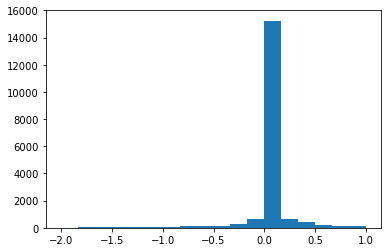

In [6]:
y1 = features_kappa(img)

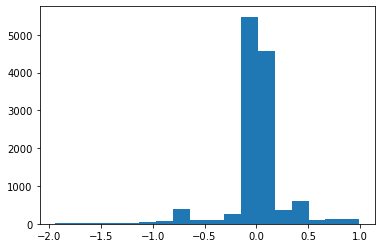

In [7]:
y2 = features_kappa(signal.medfilt2d(img, 3))

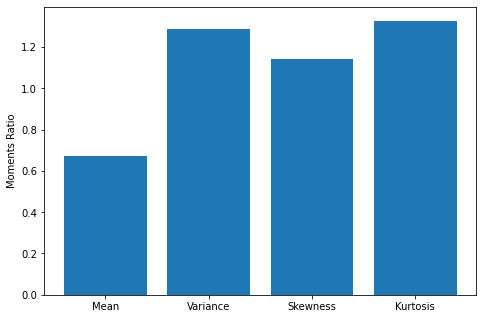

In [8]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
plt.ylabel('Moments Ratio')
moments = ['Mean', 'Variance', 'Skewness', 'Kurtosis']
freq = [y1[1]/y2[1],y1[2]/y2[2],y1[3]/y2[3],y1[4]/y2[4]]
ax.bar(moments,freq)
plt.show()